# how to deal with imbalanced data sets


In [49]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes_up_down.csv')


df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0


In [13]:
#counter module to count each class of data set

In [14]:
from collections import Counter

Counter(df['Outcome'])

Counter({0: 720, 1: 48})

In [15]:
X = df.drop(['Outcome'],axis =1)
y = df.Outcome

In [16]:
X_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=41)


In [10]:
##Oversampling (up sampling) using Smote-synthetic minority oversampling technique
#till 50-50 to 70-30 is sometimes not cosidered as imbalanced
#this technique acn be used when u have samall data
#it uses euclidian dist method and finds the closest data points

In [13]:
! pip install imblearn  

C:\Users\315ra\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [17]:
from collections import Counter

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
ove_smp = SMOTE(0.75)


In [27]:
X_train_ns,y_train_ns = ove_smp.fit_resample(X_train,y_train)


In [28]:
print ("no of data before :",format(Counter(y_train)))

print ("no of data after :",format(Counter(y_train_ns)))#check


no of data before : Counter({0: 544, 1: 32})
no of data after : Counter({0: 544, 1: 408})


In [30]:
from imblearn.under_sampling import NearMiss
ds = NearMiss(0.75)


In [32]:
X_train_ns,y_train_ns =ds.fit_resample(X_train,y_train)

In [39]:
print ("no of data before :  ",format(Counter(y_train)))

print ("no of data after  :  ",format(Counter(y_train_ns)))#check

#----------------------------------------------------------------
#0hr 47min


no of data before :   Counter({0: 544, 1: 32})
no of data after  :   Counter({0: 42, 1: 32})


In [43]:
import pandas as  pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv")


In [45]:
#replacing zero values with mean of the column

data['BMI'] =data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [46]:
data.shape

(768, 9)

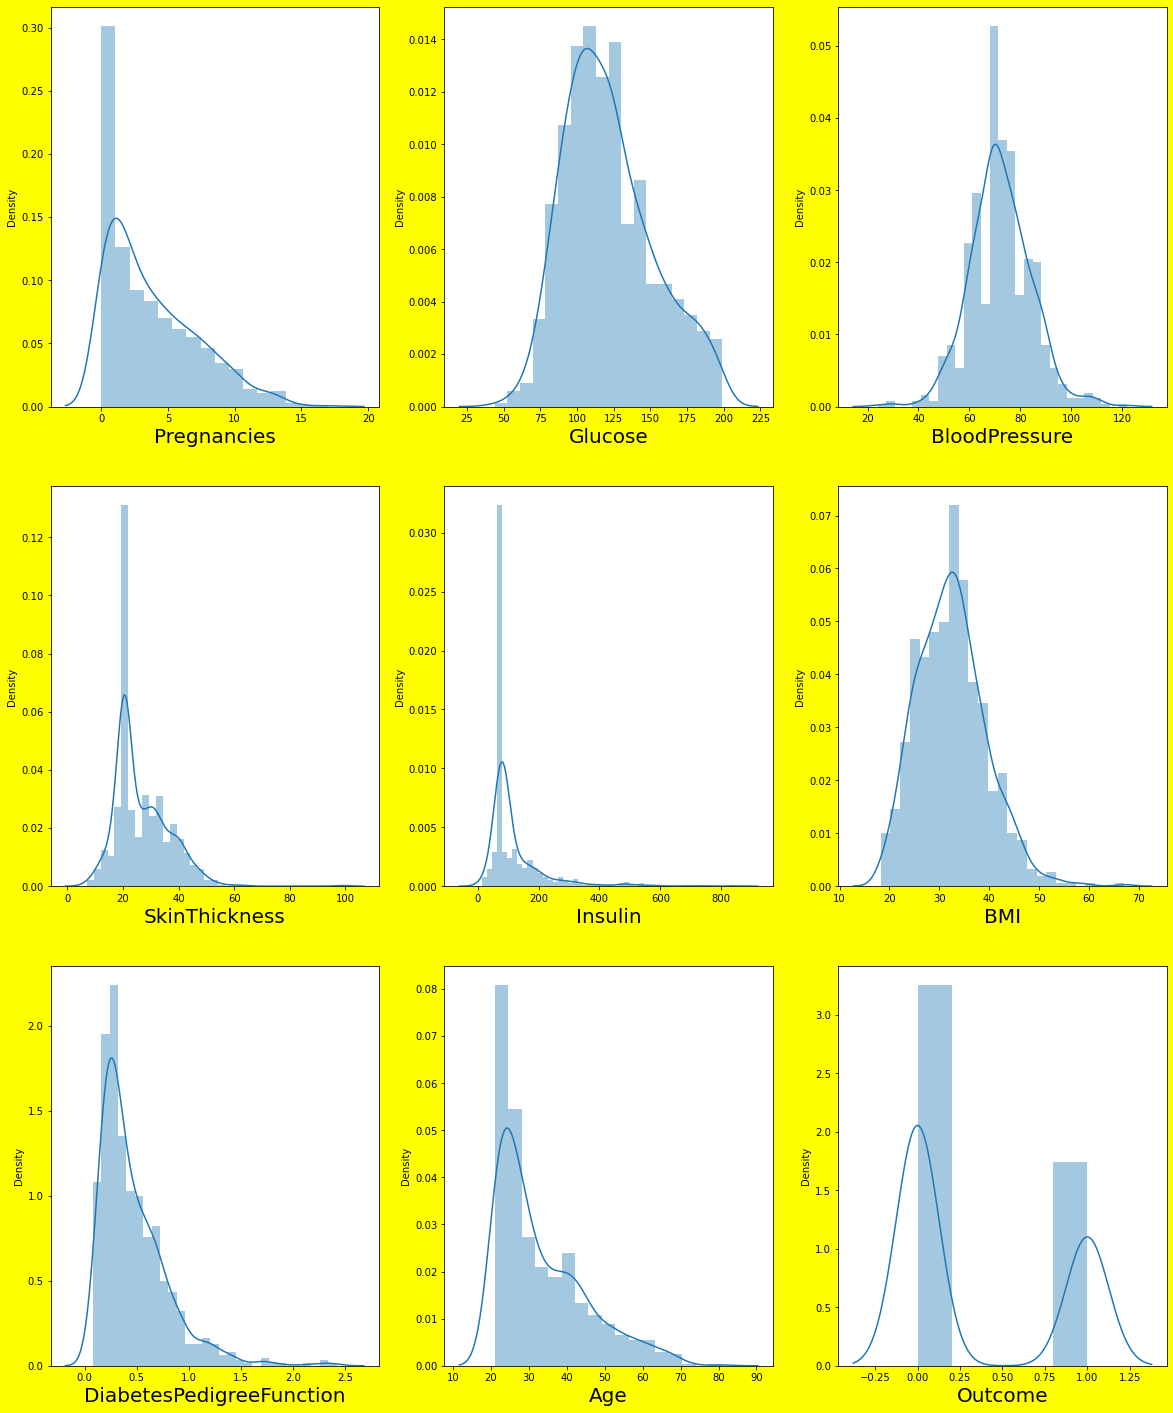

In [47]:
#lets see how updated data is distributed for every col


plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data.columns:
    if plotnumber<= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

# ##Apply log transformation on continous data
#it is primarily used to convert skewed distribution into normal distibution or less skewed distribution.
Here we take the log of these values as the column instead


In [51]:
data['Insulin'] = np.log(data['Insulin'])

data['BloodPressure'] = np.log(data['BloodPressure'])
data['SkinThickness'] = np.log(data['SkinThickness'])
data['BMI'] = np.log(data['BMI'] )
data['DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction'])
data['Age'] = np.log(datac)
'SkinThickness''SkinThickness''BMI''SkinThickness''SkinThickness''BMI''Age']

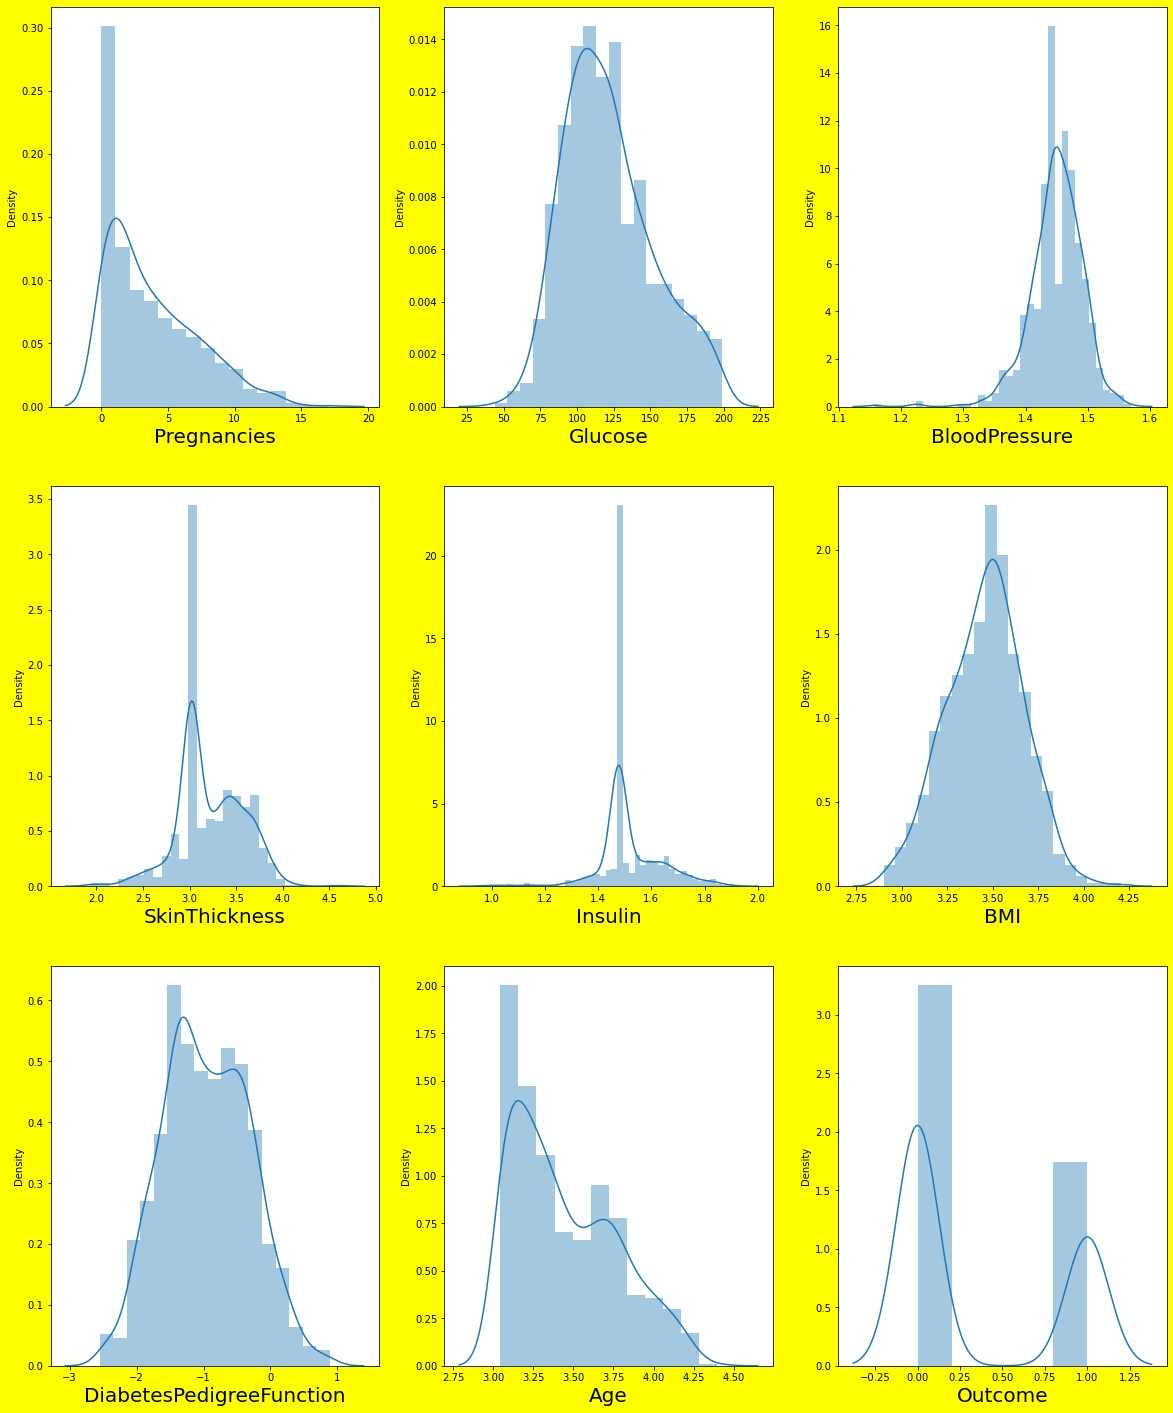

In [52]:
#lets see how transformed data is distributed for every col


plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data.columns:
    if plotnumber<= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

# Power transformer
It is a data transformation technique used to stabilize the variance,make data more normal distributed


In [53]:
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv")


In [54]:
#replacing zero values with mean of the column

data['BMI'] =data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

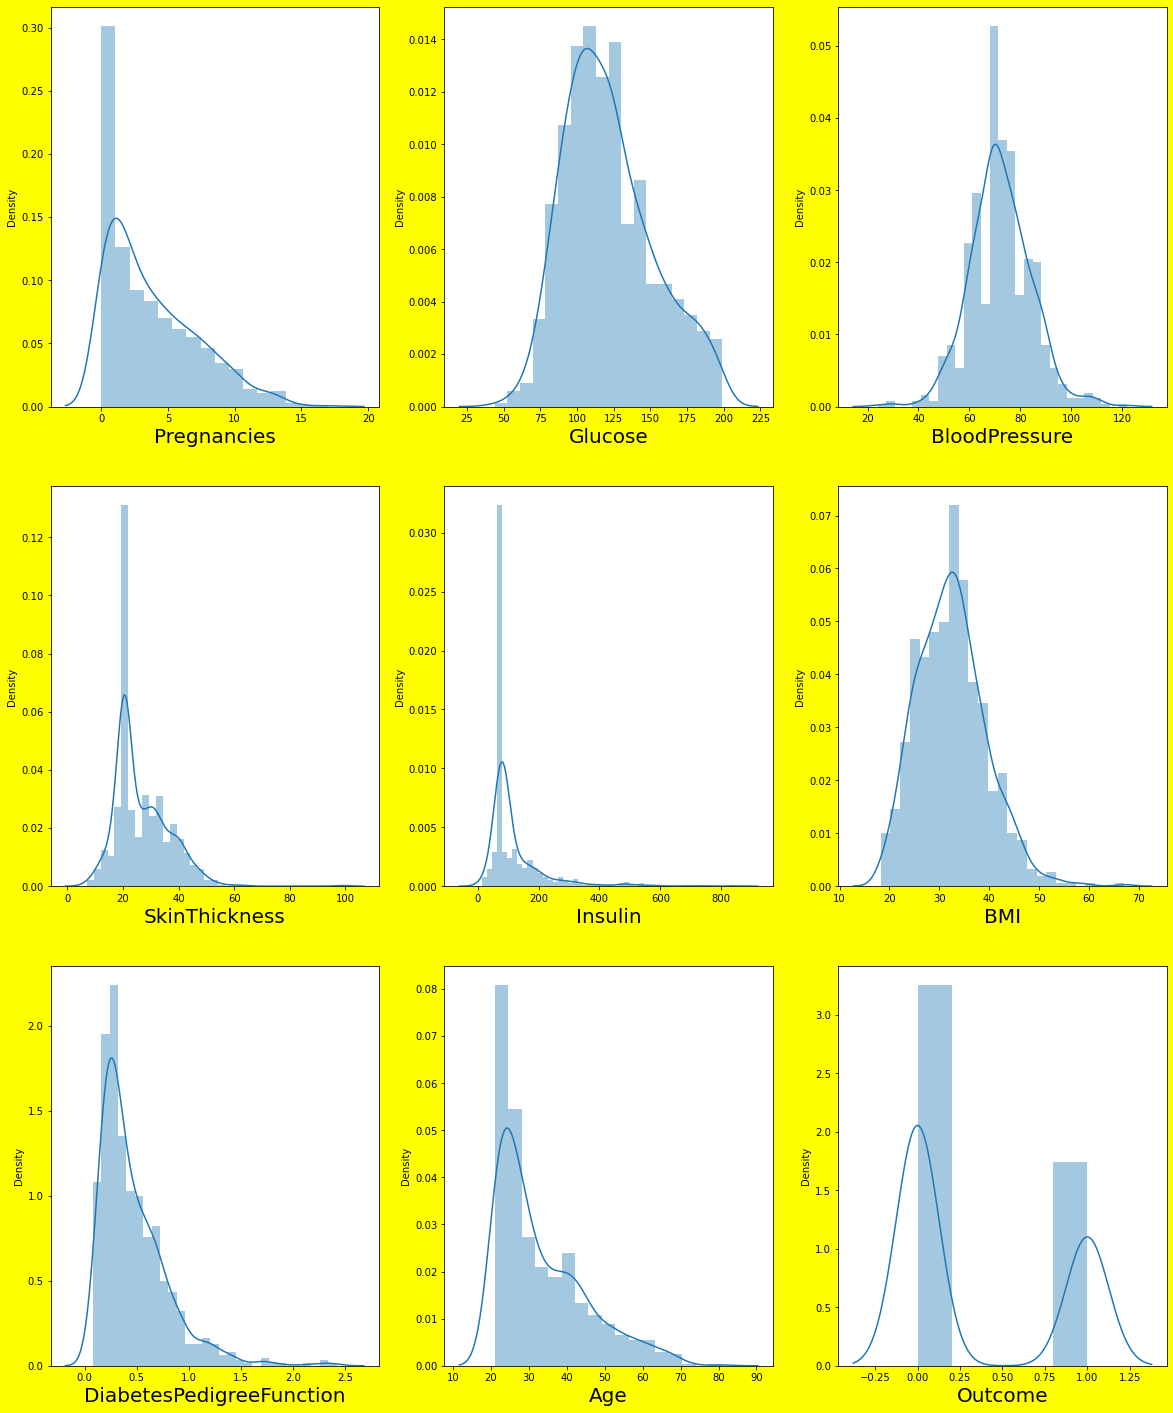

In [55]:
#lets see how updated data is distributed for every col


plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data.columns:
    if plotnumber<= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

# Box-cox works with only positive values(>0)
##yeo-johnson works with  positive and negetive values


In [56]:
#Oversampling (up sampling)  inreasing the minority data

#Undersampling(down sampling)  uses Nearmiss


In [57]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

In [59]:
#parameters: 
#        method = 'box-cox ' or 'yeo-johnson'
features = ['BMI','SkinThickness','BloodPressure','Glucose','Age']

In [60]:
data[features] = scaler.fit_transform(data[features].values)
data[features]

,BMI,SkinThickness,BloodPressure,Glucose,Age
0,0.261508,0.956846,-0.009147,0.906897,1.362797
1,-0.841776,0.415886,-0.507220,-1.305642,0.127990
2,-1.457249,-0.567991,-0.674630,1.785783,0.231506
3,-0.584749,-0.246245,-0.507220,-1.126663,-1.483064
4,1.462877,0.956846,-2.750268,0.591593,0.328461
...,...,...,...,...,...
763,0.161140,1.873163,0.319657,-0.630237,1.764261
764,0.697359,0.211217,-0.174501,0.122586,-0.366775
765,-0.912547,-0.246245,-0.009147,0.089497,0.017237
766,-0.260838,-0.567991,-1.011681,0.252538,1.236934


# svm -supportVectorClassifier
from sklearn.svm import SVM

svr-supportVectorRegression

from sklearn.svr import SVR



# principal component analysis(PCA)
#itst not a feature selection technique

In [61]:
#1hr27

In [67]:

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report ,accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col =0)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [70]:
df.shape
df.info()
#droping null col
df = df.drop(['Unnamed: 32'],axis =1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [71]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [72]:

#as we can see each feature is scaled diff ,lets sclae the data to go forward

scaler = StandardScaler()
X = df.drop('diagnosis',axis=1)
X_scaled = scaler.fit_transform(X)




In [73]:
##PCA is dimension reduction technique

pca = PCA()
pca.fit_transform(X_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

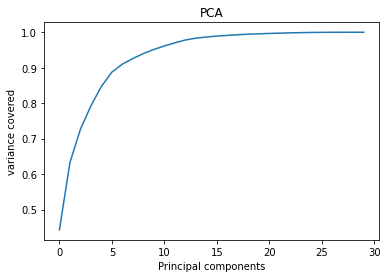

In [75]:

#lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()


In [79]:
#Around 13 principal components are able to explain>95% variance.Its safe to consider starting 13 PC's

#1he35
#make note of PCA



In [80]:
pca = PCA(n_components = 13)
new_pcomp = pca.fit_transform(X_scaled)

princi_comp = pd.DataFrame(new_pcomp,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princi_comp


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398408,-0.157119,-0.877402,0.262961,-0.858994,0.103391
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106995,0.813119,0.157911,-0.943530
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097375,0.024066,0.454275,-0.605609,0.124368,-0.410630
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059567,-1.405439,-1.116976,-1.151520,1.011286,-0.933275
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377705,0.651362,-0.110506,0.387949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035470,0.987929,0.256989,-0.062655,0.123333,-0.051725
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113359,-0.105207,-0.108633,0.244801,0.222742,-0.192638
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840513,0.096466,0.157417
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223081,-0.280239,-0.542035,-0.089296,-0.178627,-0.697442,1.225196


In [83]:
#repace label column  into binary codes

df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

y=df['diagnosis'] 


x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size =0.25,random_state =41)



#2hr4min


In [84]:
def metric_score (clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)	
        print('accuracy score: {accuracy_score(y_train,y_pred) *100:.2f}%')
        print('accuracy score:',round(accuracy_score(y_train,y_pred)*100,2))
    elif train==False :
        pred = clf.predict(x_test)
        print("accuracy score: {accuracy_score(y_test,pred) *100:.2}%")
        print('accuracy score:',round(accuracy_score(y_test,pred) *100,2))
        print('\n\n Classification Report \n' ,classification_report(y_test,pred,digits=2))
        


In [85]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train,y_train)


SVC()

In [86]:
#calling the fn
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2f}%
accuracy score: 97.89
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 98.6


 Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()

gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [90]:
#calling the fn
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2f}%
accuracy score: 97.89
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 98.6


 Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)



RandomForestClassifier()

In [93]:
#calling the fn
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2f}%
accuracy score: 97.89
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 98.6


 Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



# Hyperparameter tuning

#C - it gives us a no of errors allowed
#    -low c means less eroor
# 	-large c allows more no of errors



In [95]:
#gamma-it decides how much cutvature we want in decision boundary .gamma
#high means more curvature
#gamma low means low less curvature


In [106]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid ={'C' :[1,5,10,15,20],'gamma': [0.01,.01,.02,.002]}


gridsearch = GridSearchCV(svc,param_grid)


In [117]:
gridsearch.fit(x_train,y_train)

gridsearch.best_params_


{'C': 5, 'gamma': 0.02}

In [120]:
#SVC mode traiing and printing traintest score
svc=SVC(C=5 ,gamma=.01)
svc.fit(x_train,y_train)

SVC(C=5, gamma=0.01)

In [121]:
#calling the fn
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2f}%
accuracy score: 98.36
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 100.0


 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        53

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

